In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])

## Question 1

Let $X$ be a r.v. specifying the location at which a decay occurs and $f(x)$ be the corresponding probability density function for a particle interacting between $x=x_0$ and $x=\infty$. Since $p(x)=f(x)dx \propto x^{-2}$ we can write

$$f(x)dx = Ax^{-2}dx \hspace{5mm} x_0<x<\infty$$

where $A$ is a normalizing constant given by

$$\int_{x_0}^{\infty}Ax^{-2}dx = 1 \implies \frac{A}{x_0}=1 \implies A=x_0$$

This tells us that our probability density function is given by $f(x)=x_0x^{-2}$. The CDF is given by

$$F(x) = \int_{x_0}^{x} f(x')dx' = \int_{x_0}^{x}x_0x^{-2} dx' = 1-\frac{x_0}{x}$$

This is for $x \geq x_0$. When $x<x_0$ we have $f(x)=F(x)=0$

## Question 2

Using 

$$F[F^{-1}(x)] = x \implies 1-\frac{x_0}{F^{-1}(x)} = x \implies F^{-1}(x)= \frac{x_0}{1-x}$$

The probability integral transform tells us that if r.v $X$ has cdf $F$ then $F^{-1}(U)$ (where $U$ is a uniform r.v. between 0 and 1) also has cdf $F$.

$$\implies F^{-1}(U) = \frac{x_0}{1-U} \sim X$$

where $\sim$ means that the two distributions are identical.

## Question 3

Define $x_0$ and $F^{-1}(x)$. Run simulation for 100 random uniform numbers

In [2]:
x0 = 5 # cm
r = np.random.rand(100)
x = x0/(1-r)
# Events less than 30 cm
x_l30 = x[x<30]

Make a plot with binning every 5cm

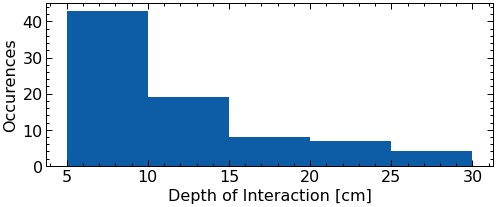

In [3]:
bins = np.arange(5,35,5)
plt.figure(figsize=(8,3))
plt.hist(x_l30, bins=bins)
plt.ylabel('Occurences')
plt.xlabel('Depth of Interaction [cm]')
plt.show()

The proportion of events we expect to reach beyond 30cm are

$$1-F(x=30\text{cm}) = \frac{5}{30} = 1/6$$

The total amount of simulated events that occured beyond 30cm are printed below:

In [4]:
len(x[x>30])

19

This is approximately 1/6 of 100, the total number of events. 

**As an extension**, note that this isn't exactly 1/6 of the total number events. This is because the number of events that we expect to reach beyond 30 cm (which I will call $Y$) is itself a binomial random variable with $n=100$ and $p=1-F(x=30\text{cm})$. This means that

* $E[Y]=np = 16.67$
* $\text{Var}[Y] = np(1-p)= 13.89$

This can be verified through repeated Monte Carlo trials. We will do 10000 experiments where we determine the number of particles (r.v. $Y$) that surpass 30cm in 100 trials.

In [5]:
x0 = 5 # cm
r = np.random.rand(100, 100000)
x = x0/(1-r)
# Events that surpass 30 cm
y = (x>=30).sum(axis=0)

Mean number of events

In [6]:
np.mean(y)

16.65104

Variance in number of events (out of 100) that are greater than 30cm.

In [7]:
np.var(y)

13.862686918399998